In [1]:
#This project focuses on testing ensemble methods to increase accuracy of models to predict insurance fraud

In [2]:
#Import Libraries which are needed to preliminary data analysis
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
#The data which is in csv and can also be downloaded from the Github repository
df=pd.read_csv("C:\\Users\\carol\\Desktop\\School\\Ryerson\\CIND860\\insurance_claims.csv")

In [5]:
#Exploring the Data

In [6]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,2015-01-25,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,2015-01-21,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,2015-02-22,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,2015-01-10,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,2015-02-17,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [7]:
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,0.0
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,NaN
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,NaN
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,NaN
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,NaN
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,NaN
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,NaN
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,NaN


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [9]:
#_c39 --> seems like a junk column - remove it
df = df.drop('_c39', axis=1)

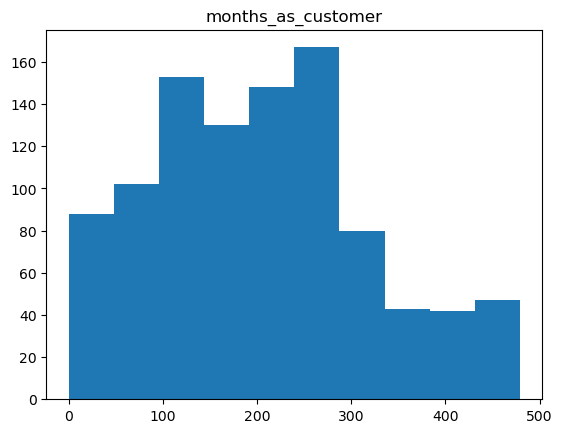

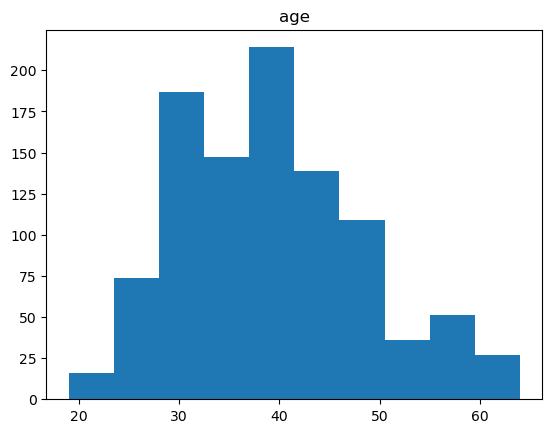

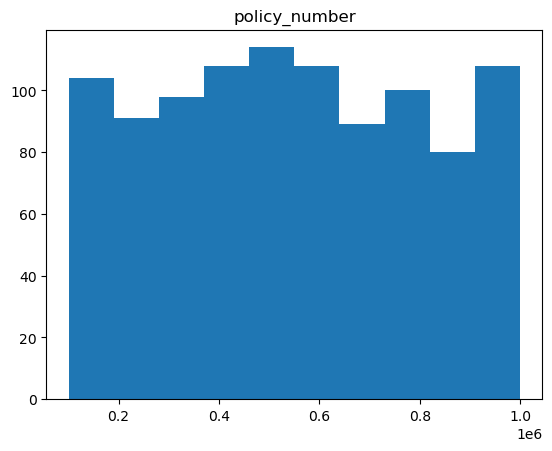

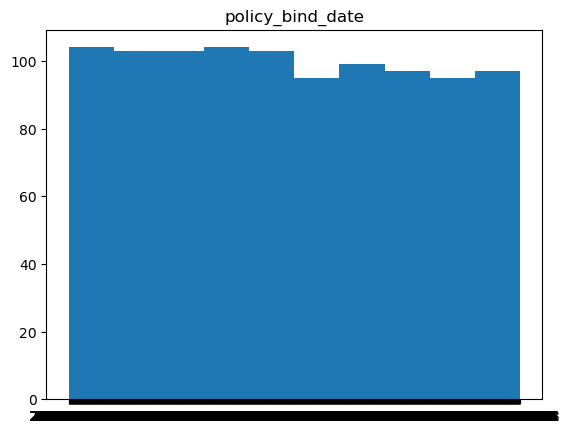

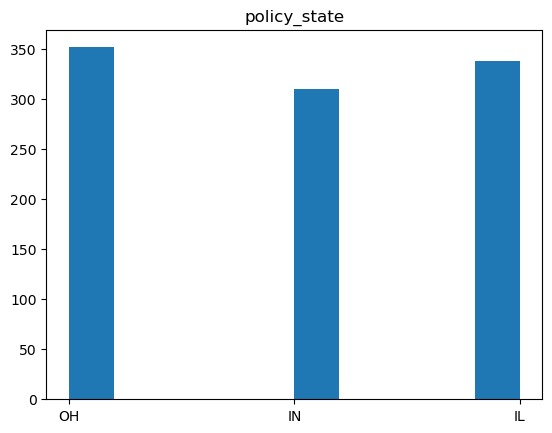

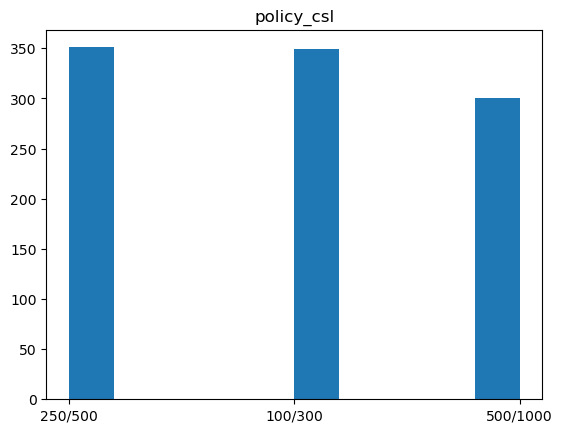

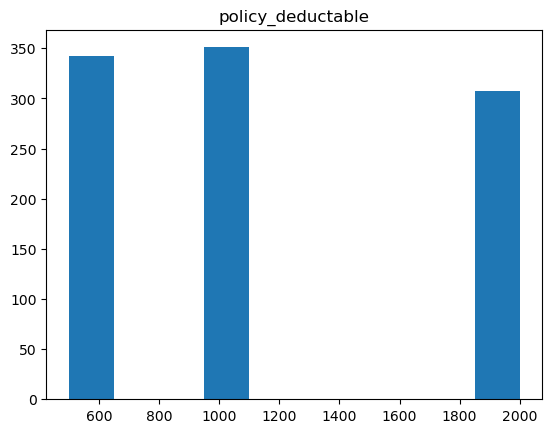

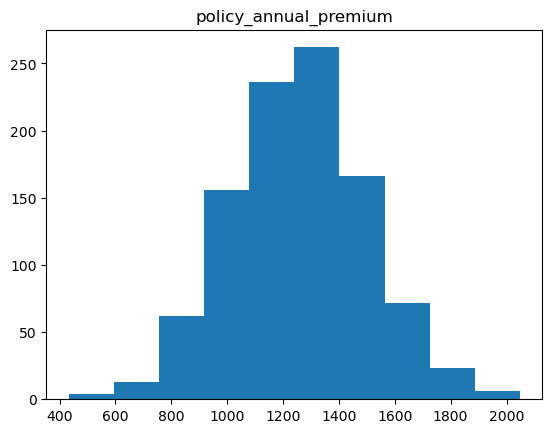

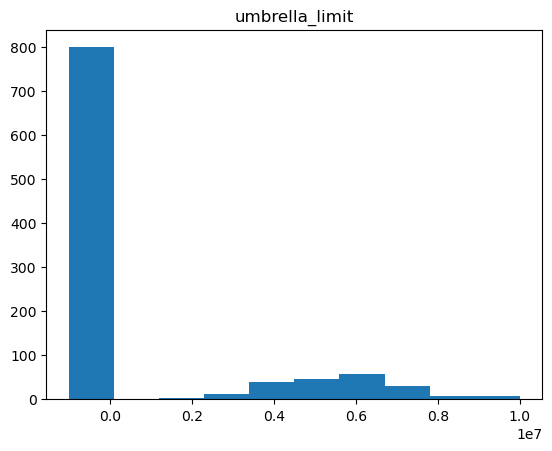

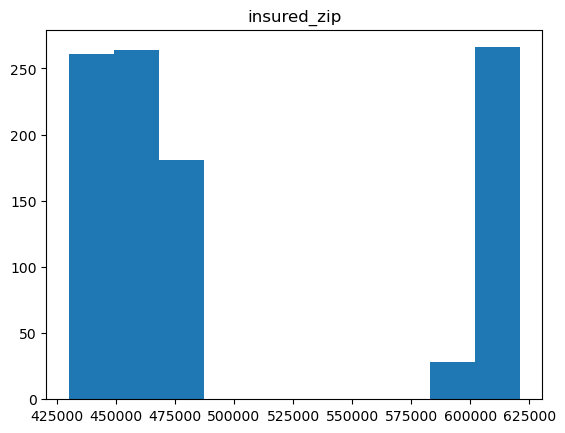

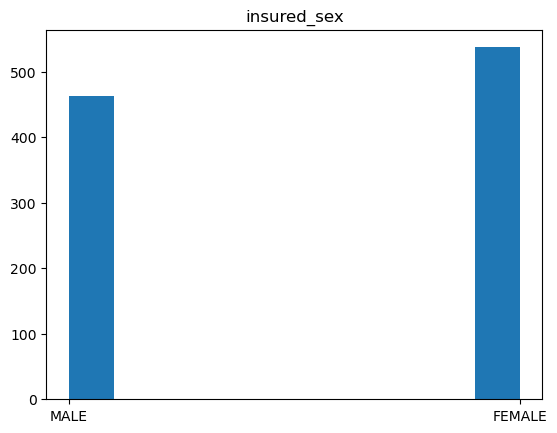

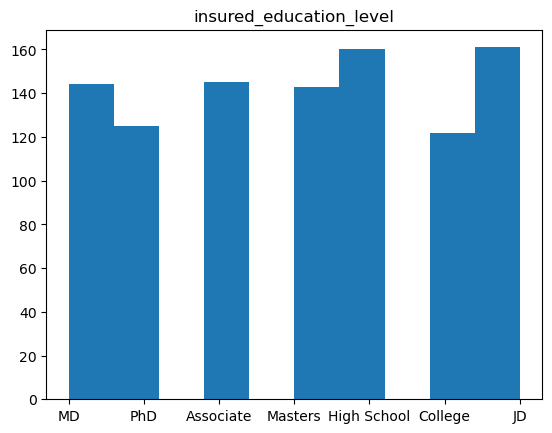

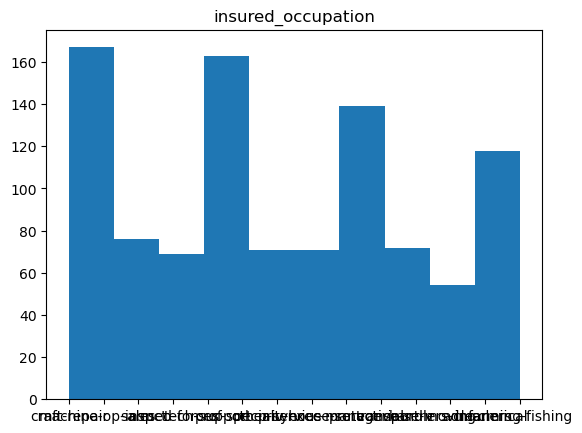

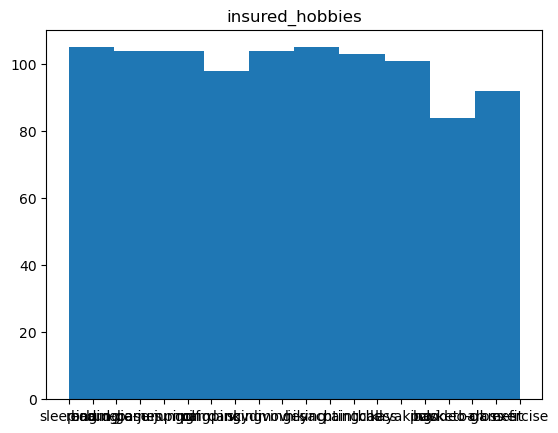

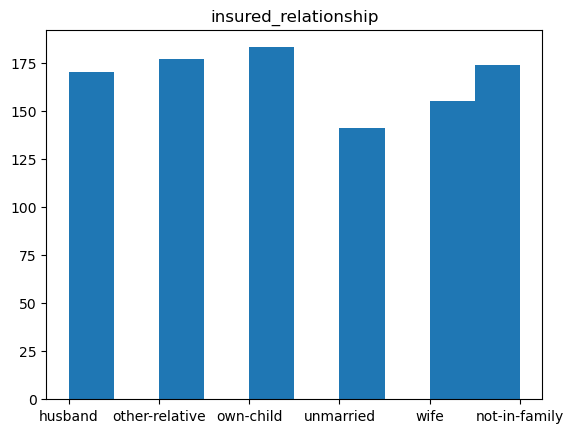

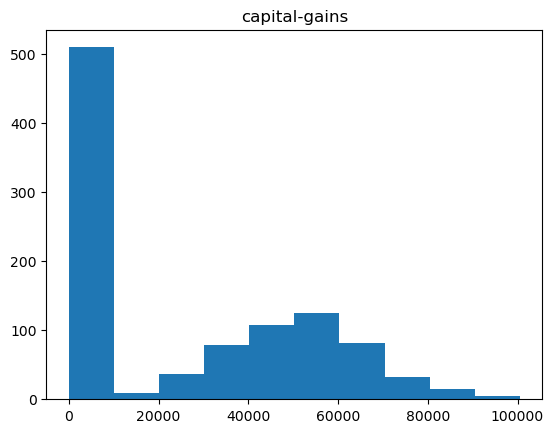

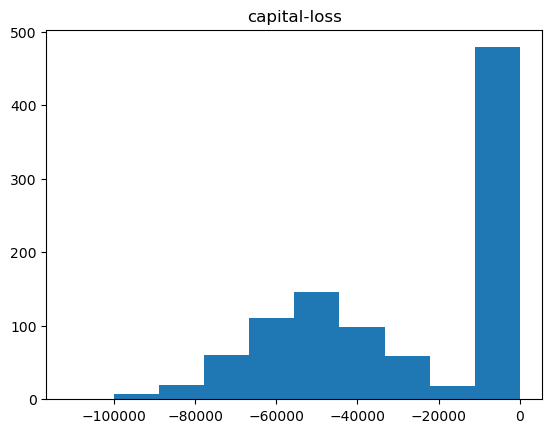

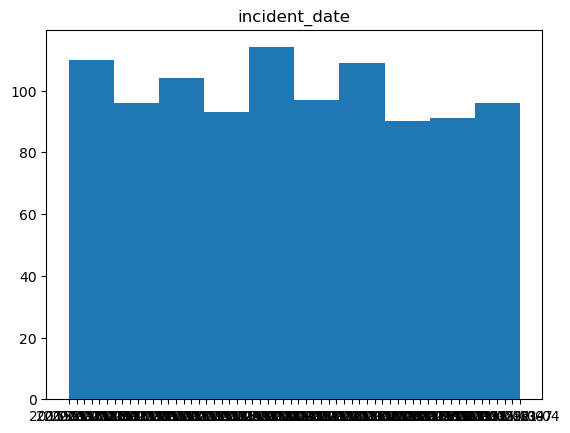

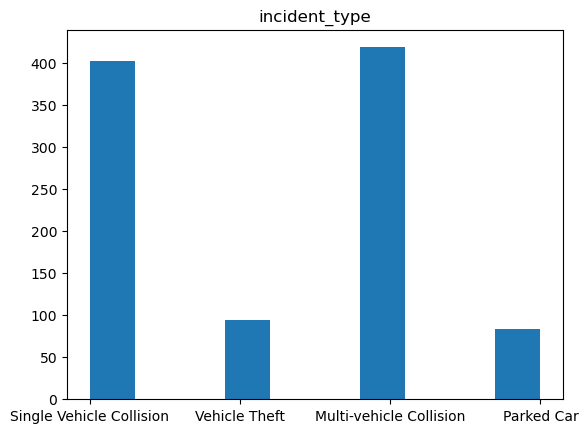

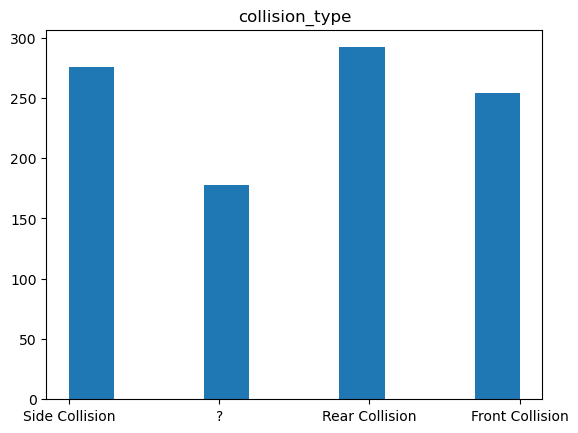

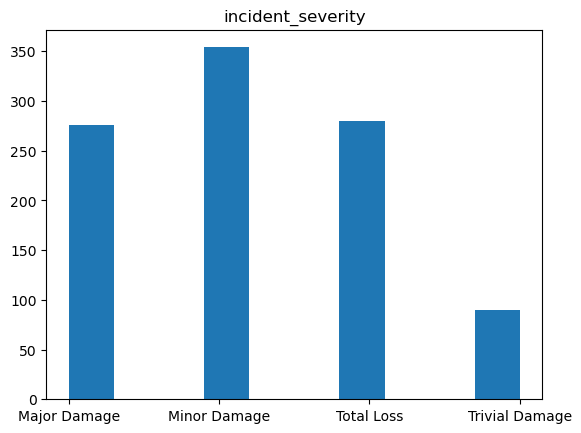

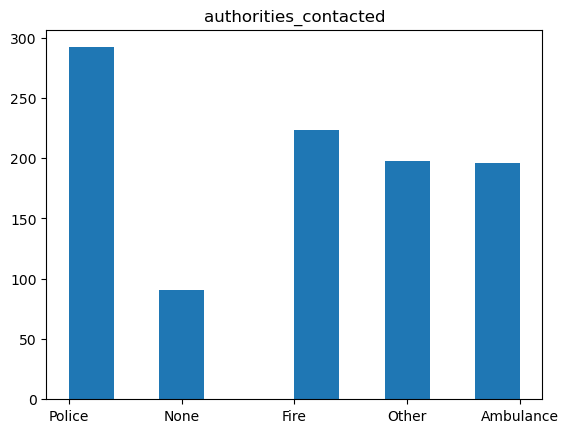

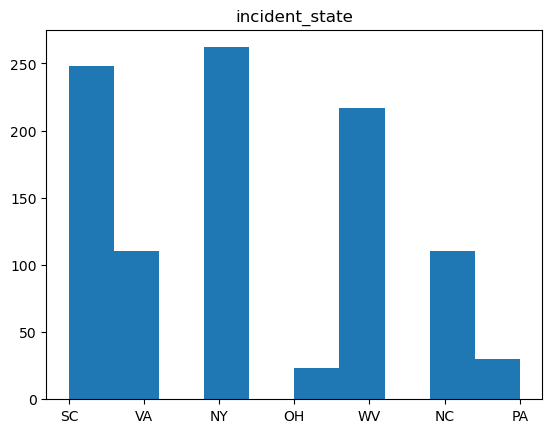

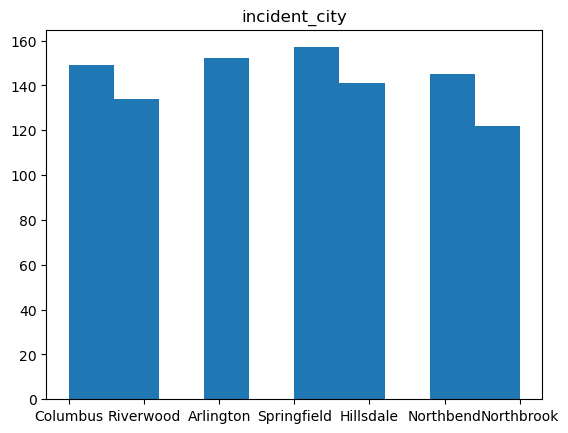

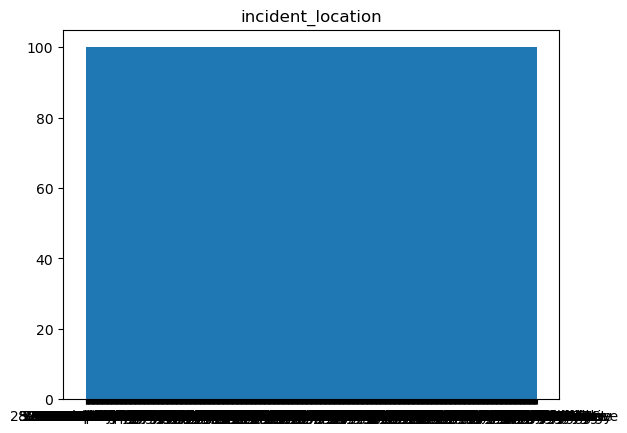

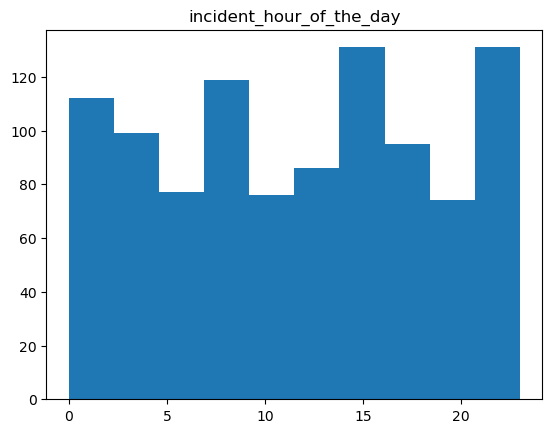

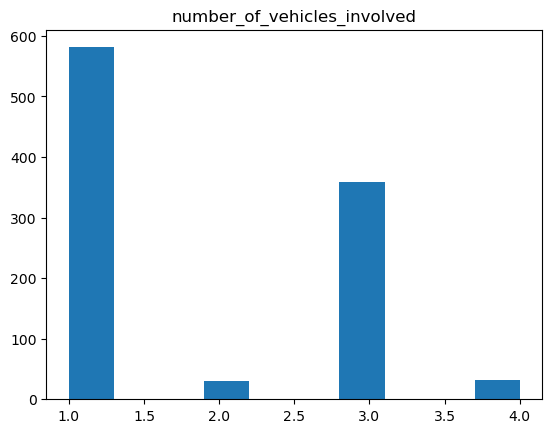

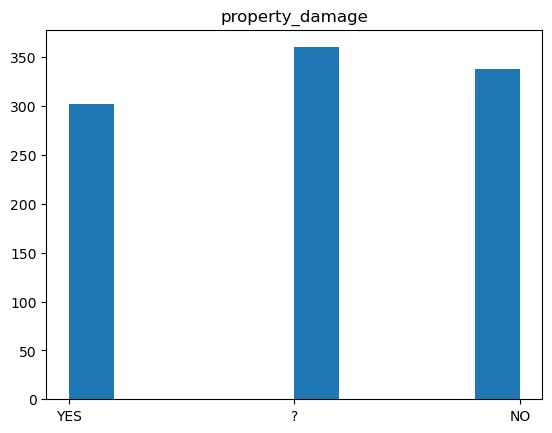

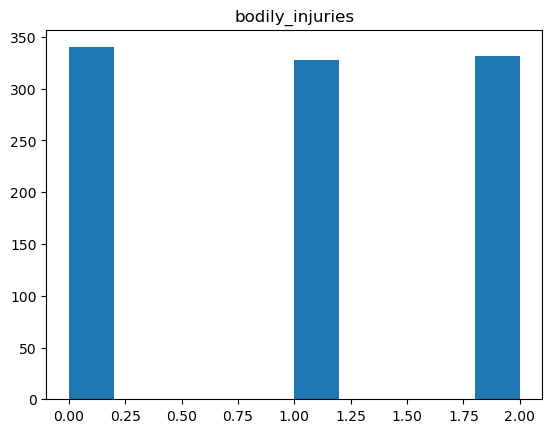

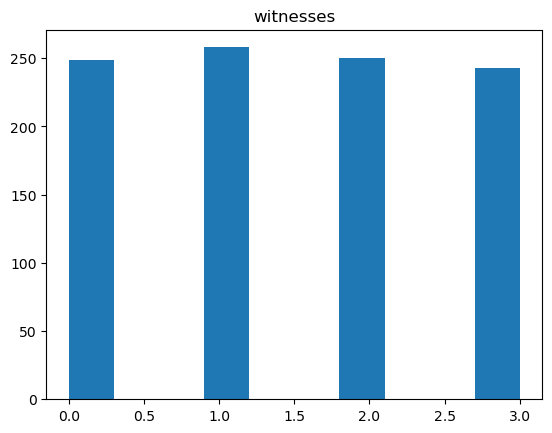

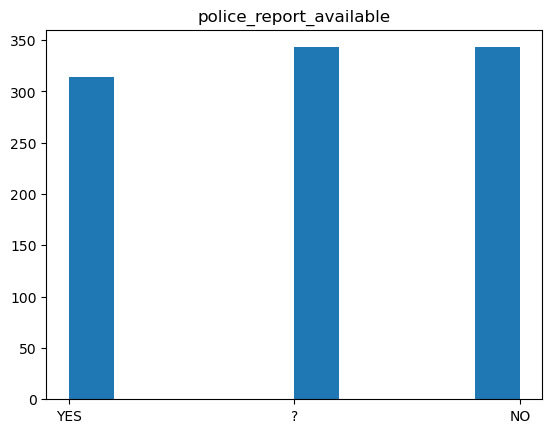

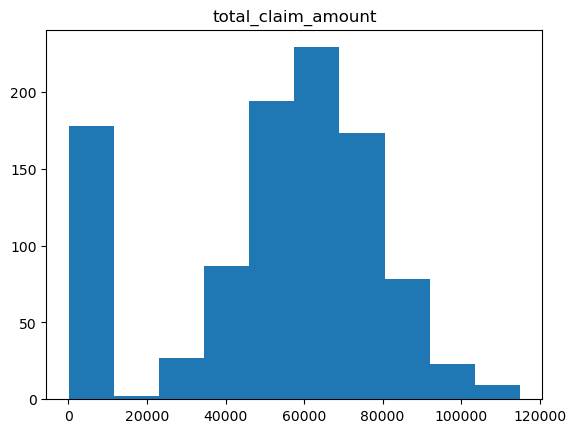

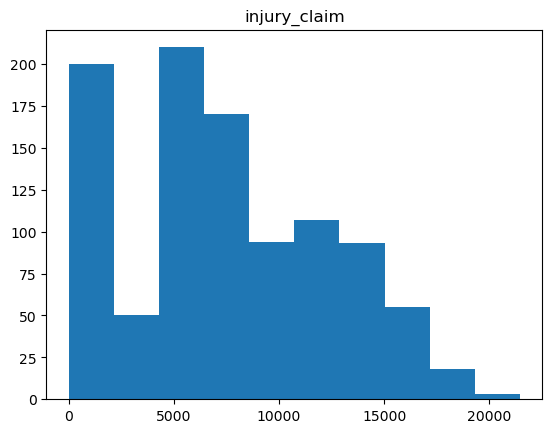

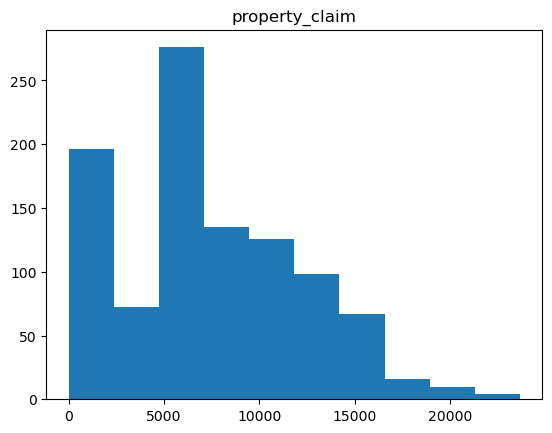

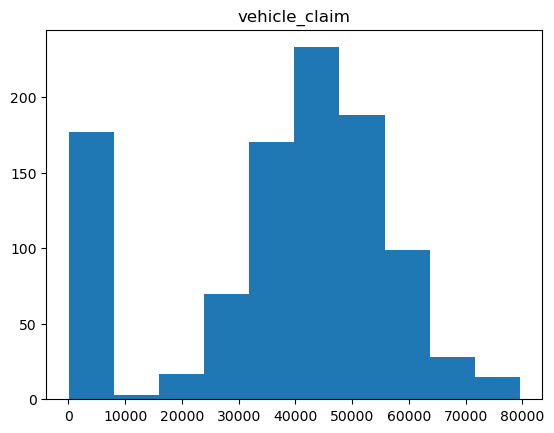

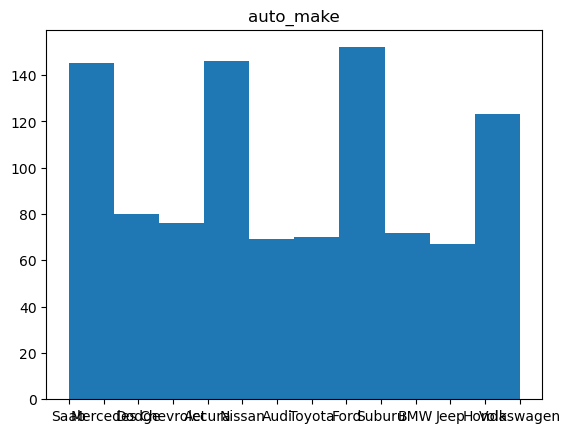

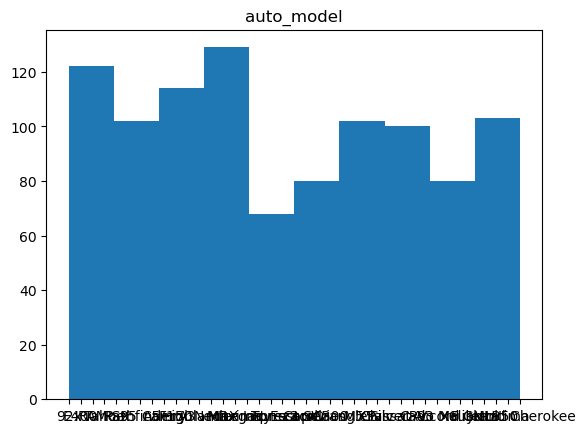

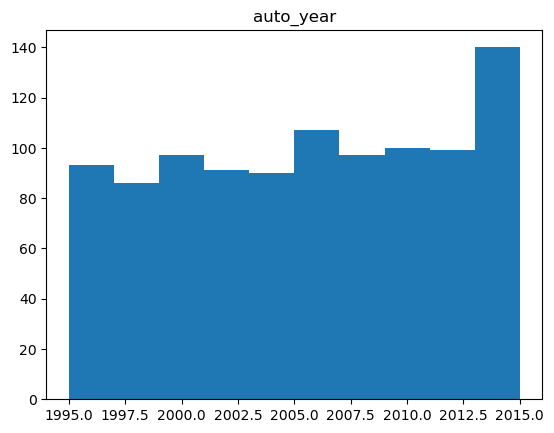

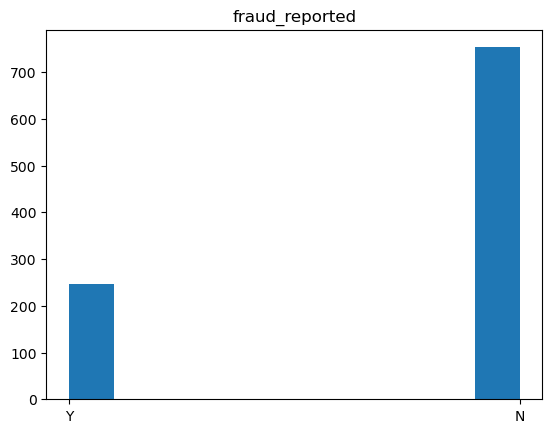

In [10]:
#plot the quantitative features to visualize and see whether there is normal distribution
for i in df.columns:
    plt.hist(df[i])
    plt.title(i)
    plt.show()

In [11]:
#change capital loss to positive (+) intergers for clarity
df["capital-loss"] = df["capital-loss"]*-1

In [12]:
#confirm the change
df["capital-loss"].head()

0        0
1        0
2        0
3    62400
4    46000
Name: capital-loss, dtype: int64

In [13]:
#take a look at any correlations that may be immediately apparent
df.corr()

C:\Users\carol\AppData\Local\Temp\ipykernel_23196\3483866713.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
months_as_customer,1.000000,0.922098,0.057555,0.026807,0.005018,0.015498,0.017895,0.006399,-0.020209,0.070639,0.014736,-0.010162,0.058383,0.062108,0.065329,0.034940,0.061013,-0.000292
age,0.922098,1.000000,0.059413,0.029188,0.014404,0.018126,0.025604,-0.007075,-0.007368,0.087161,0.022102,-0.015679,0.052359,0.069863,0.075522,0.060898,0.062588,0.001354
policy_number,0.057555,0.059413,1.000000,-0.006738,0.022566,0.008968,0.007083,0.009802,0.005669,0.000113,0.013432,-0.004558,-0.012661,-0.018009,-0.008762,-0.010678,-0.020184,-0.000183
policy_deductable,0.026807,0.029188,-0.006738,1.000000,-0.003245,0.010870,0.004545,0.035212,0.023544,0.060935,0.051214,-0.022765,0.066639,0.022839,0.039107,0.064792,0.005269,0.026105
policy_annual_premium,0.005018,0.014404,0.022566,-0.003245,1.000000,-0.006247,0.032354,-0.013738,-0.023547,-0.001578,-0.045991,0.026780,0.002332,0.009094,-0.017633,-0.011654,0.020246,-0.049226
umbrella_limit,0.015498,0.018126,0.008968,0.010870,-0.006247,1.000000,0.019671,-0.047268,0.024056,-0.023257,-0.021270,0.022743,-0.006738,-0.040344,-0.045412,-0.023790,-0.038584,0.009893
insured_zip,0.017895,0.025604,0.007083,0.004545,0.032354,0.019671,1.000000,0.006303,-0.049372,0.008274,0.027448,0.028695,0.019805,-0.033873,-0.017495,-0.006841,-0.041083,-0.032736
capital-gains,0.006399,-0.007075,0.009802,0.035212,-0.013738,-0.047268,0.006303,1.000000,0.046904,-0.016406,0.061643,0.055829,-0.017651,0.015980,0.025934,-0.000779,0.015836,0.031398
capital-loss,-0.020209,-0.007368,0.005669,0.023544,-0.023547,0.024056,-0.049372,0.046904,1.000000,0.025054,0.014895,0.024418,0.041330,0.036060,0.046060,0.022863,0.032665,0.056615
incident_hour_of_the_day,0.070639,0.087161,0.000113,0.060935,-0.001578,-0.023257,0.008274,-0.016406,0.025054,1.000000,0.120794,-0.034563,0.006527,0.217702,0.165768,0.179536,0.215626,0.021368


In [14]:
corr=df.corr()

C:\Users\carol\AppData\Local\Temp\ipykernel_23196\1726683880.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df.corr()


<Axes: >

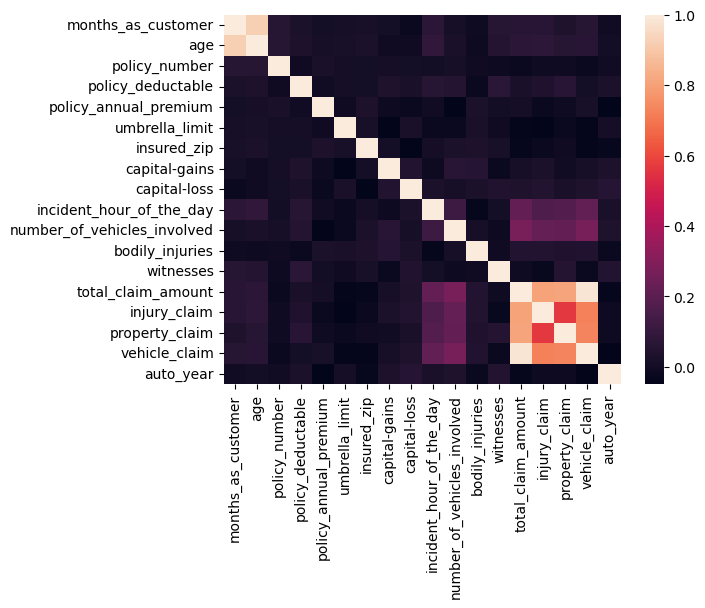

In [15]:
sns.heatmap(corr)

In [16]:
#There are correlations which the claim amounts in different areas (properly/injur/vehicle) which makes sense as the severity of the
# accident would affect all of those. Age and months as a customer are strongly correlated.

In [17]:
#Investigate the distribution of the fraud reported column
num_fraud = df["fraud_reported"].value_counts()
num_fraud

N    753
Y    247
Name: fraud_reported, dtype: int64

In [18]:
#DATA CLEANING

In [19]:
#It is necessary to see the correlation for fraud reported with the other features are it is the dependent variable.
df['fraud_reported'] = df['fraud_reported'].map({'Y': 1, 'N': 0})

In [20]:
#Other features which could be quantified easily: "insured_sex"; "insured_education_level"; "incident_severity"; "authorities_contacted";
# "police_report_available"
df["insured_sex"].value_counts()

FEMALE    537
MALE      463
Name: insured_sex, dtype: int64

In [21]:
df['insured_sex'] = df['insured_sex'].map({'FEMALE': 1, 'MALE': 0})

In [22]:
df["insured_education_level"].value_counts()

JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64

In [23]:
df['insured_education_level'] = df['insured_education_level'].map({'High School': 0, 'College': 1, 'Associate': 2, 'Masters': 3, 'JD': 4, 'MD': 5, 'PhD': 6})

In [24]:
df["incident_severity"].value_counts()

Minor Damage      354
Total Loss        280
Major Damage      276
Trivial Damage     90
Name: incident_severity, dtype: int64

In [25]:
df['incident_severity'] = df['incident_severity'].map({'Trivial Damage': 0, 'Minor Damage': 1, 'Major Damage': 2, 'Total Loss':3})

In [26]:
df["police_report_available"].value_counts()

?      343
NO     343
YES    314
Name: police_report_available, dtype: int64

In [27]:
df["authorities_contacted"].value_counts()

Police       292
Fire         223
Other        198
Ambulance    196
None          91
Name: authorities_contacted, dtype: int64

In [28]:
df.where(df['police_report_available'] == 2)['authorities_contacted'].dropna().values.tolist()

[]

In [29]:
#too many unknowns  - drop this column - hopefully authorities contacted will provide the information needed.
df = df.drop('police_report_available', axis=1)

In [30]:
#Add a column that designates a binary distinction whether the authorities where contacted.
df['auth_contact'] = np.where(df['authorities_contacted']== "None", 0, 1)

In [31]:
#Redo the correlation calculations with fraud included.
df.corr()

C:\Users\carol\AppData\Local\Temp\ipykernel_23196\2902246279.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,capital-gains,capital-loss,incident_severity,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,fraud_reported,auth_contact
months_as_customer,1.000000,0.922098,0.057555,0.026807,0.005018,0.015498,0.017895,-0.060925,0.026019,0.006399,-0.020209,0.003005,0.070639,0.014736,-0.010162,0.058383,0.062108,0.065329,0.034940,0.061013,-0.000292,0.020544,0.029489
age,0.922098,1.000000,0.059413,0.029188,0.014404,0.018126,0.025604,-0.073337,0.032546,-0.007075,-0.007368,0.009513,0.087161,0.022102,-0.015679,0.052359,0.069863,0.075522,0.060898,0.062588,0.001354,0.012143,0.032071
policy_number,0.057555,0.059413,1.000000,-0.006738,0.022566,0.008968,0.007083,-0.004564,-0.039004,0.009802,0.005669,-0.028579,0.000113,0.013432,-0.004558,-0.012661,-0.018009,-0.008762,-0.010678,-0.020184,-0.000183,-0.029443,-0.001944
policy_deductable,0.026807,0.029188,-0.006738,1.000000,-0.003245,0.010870,0.004545,0.009733,0.040088,0.035212,0.023544,0.012795,0.060935,0.051214,-0.022765,0.066639,0.022839,0.039107,0.064792,0.005269,0.026105,0.014817,-0.023446
policy_annual_premium,0.005018,0.014404,0.022566,-0.003245,1.000000,-0.006247,0.032354,-0.038853,-0.022745,-0.013738,-0.023547,0.020233,-0.001578,-0.045991,0.026780,0.002332,0.009094,-0.017633,-0.011654,0.020246,-0.049226,-0.014480,0.002481
umbrella_limit,0.015498,0.018126,0.008968,0.010870,-0.006247,1.000000,0.019671,-0.010688,-0.004053,-0.047268,0.024056,-0.045779,-0.023257,-0.021270,0.022743,-0.006738,-0.040344,-0.045412,-0.023790,-0.038584,0.009893,0.058622,-0.017881
insured_zip,0.017895,0.025604,0.007083,0.004545,0.032354,0.019671,1.000000,0.036942,0.032596,0.006303,-0.049372,-0.060301,0.008274,0.027448,0.028695,0.019805,-0.033873,-0.017495,-0.006841,-0.041083,-0.032736,0.019368,-0.027230
insured_sex,-0.060925,-0.073337,-0.004564,0.009733,-0.038853,-0.010688,0.036942,1.000000,0.005223,0.020494,-0.021705,0.009149,-0.019290,-0.018793,0.020297,-0.042463,0.023727,-0.000924,0.014868,0.029609,0.028247,-0.030873,0.040911
insured_education_level,0.026019,0.032546,-0.039004,0.040088,-0.022745,-0.004053,0.032596,0.005223,1.000000,0.049636,-0.042525,0.063061,-0.037015,-0.022403,-0.003297,0.030376,0.048574,0.059405,0.027391,0.045553,0.031753,0.025857,0.006846
capital-gains,0.006399,-0.007075,0.009802,0.035212,-0.013738,-0.047268,0.006303,0.020494,0.049636,1.000000,0.046904,0.021358,-0.016406,0.061643,0.055829,-0.017651,0.015980,0.025934,-0.000779,0.015836,0.031398,-0.019173,-0.034313


C:\Users\carol\AppData\Local\Temp\ipykernel_23196\133148687.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df.corr()


<Axes: >

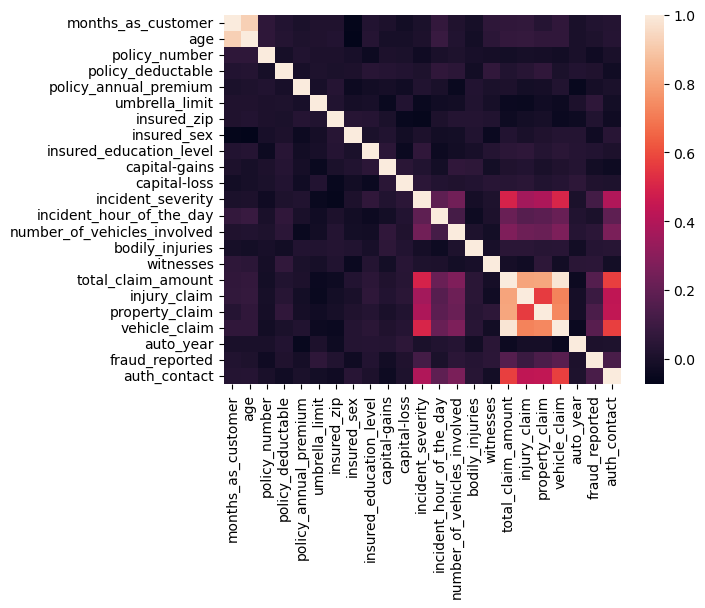

In [32]:
corr=df.corr()
sns.heatmap(corr)

In [33]:
#INCIDENT STATE== POLICY STATE?
df['same_state'] = np.where(df['policy_state']== df["incident_state"], 1, 0)

In [34]:
#Remove unnecessary columns.
# policy_number --> could be used to identify customer. Likely randomly provided so should not contain valuable information.
# if policy number assigned with purpose, that information is not available and therefore would not be helpful.
# incident location can also lead to bias of affluent vs. less affluent areas
# auto model is not needed as auto make is more general and may provide the necessary information
# policy bind date is unlikely to provide any more information than months as a customer

df = df.drop("policy_number", axis=1)
df = df.drop("incident_location", axis=1)
df = df.drop("incident_city", axis=1)
df = df.drop("incident_date", axis=1)
df = df.drop("auto_model", axis=1)
df = df.drop("policy_bind_date", axis=1)
df = df.drop("policy_csl", axis=1)
df = df.drop("policy_state", axis=1)
df = df.drop("incident_state", axis=1)


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_deductable            1000 non-null   int64  
 3   policy_annual_premium        1000 non-null   float64
 4   umbrella_limit               1000 non-null   int64  
 5   insured_zip                  1000 non-null   int64  
 6   insured_sex                  1000 non-null   int64  
 7   insured_education_level      1000 non-null   int64  
 8   insured_occupation           1000 non-null   object 
 9   insured_hobbies              1000 non-null   object 
 10  insured_relationship         1000 non-null   object 
 11  capital-gains                1000 non-null   int64  
 12  capital-loss                 1000 non-null   int64  
 13  incident_type      

In [36]:
column_names=list(df)

In [37]:
#Determine the number of unique values in the features. It will be helpful to efficient processing to decrease the number of unique values
num_unique_values = df.nunique()

In [38]:
num_unique_values

months_as_customer             391
age                             46
policy_deductable                3
policy_annual_premium          991
umbrella_limit                  11
insured_zip                    995
insured_sex                      2
insured_education_level          7
insured_occupation              14
insured_hobbies                 20
insured_relationship             6
capital-gains                  338
capital-loss                   354
incident_type                    4
collision_type                   4
incident_severity                4
authorities_contacted            5
incident_hour_of_the_day        24
number_of_vehicles_involved      4
property_damage                  3
bodily_injuries                  3
witnesses                        4
total_claim_amount             763
injury_claim                   638
property_claim                 626
vehicle_claim                  726
auto_make                       14
auto_year                       21
fraud_reported      

In [39]:
#drop the very highly unique values which would be difficult to generalize. The monetary features such as annual premiumm claim amounts etc.
# can be generalized in value.
df = df.drop("insured_zip", axis=1)

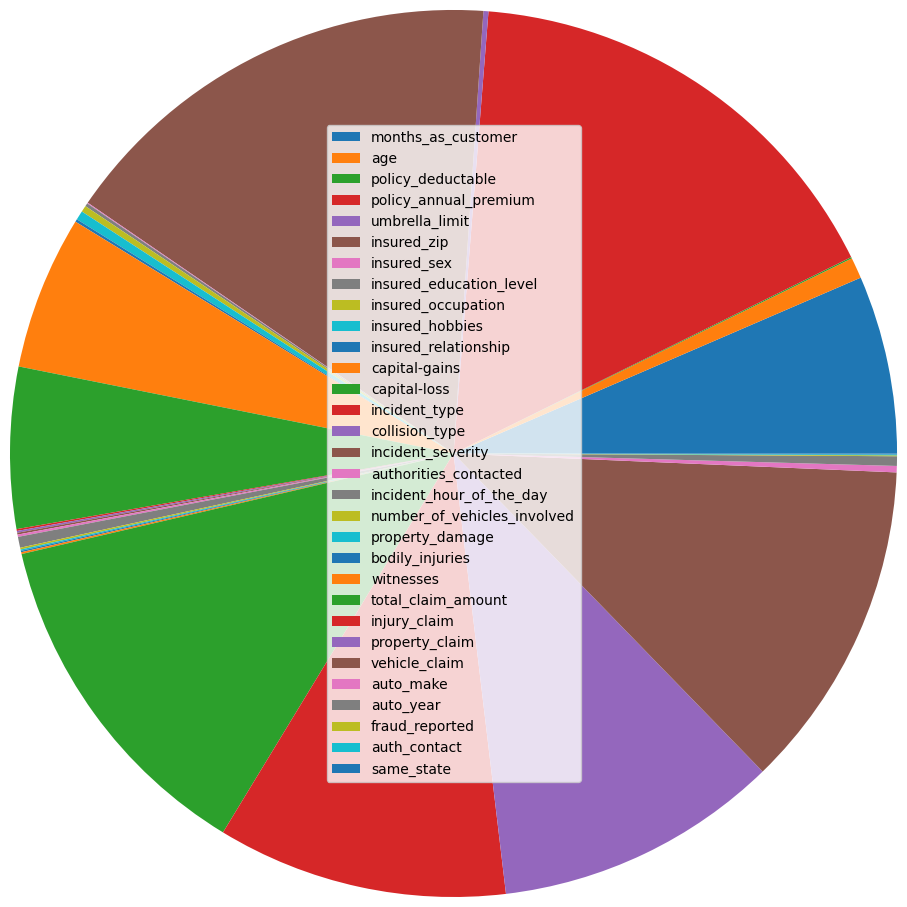

In [40]:
#pie chart to demonstrate the number of unique values
plt.pie(num_unique_values, radius=3)
plt.legend(labels=column_names, loc="center")
plt.show()

In [41]:
#There are certain features which contain "?" as a value. 

#collision type has "?"
#property damage has "?"

df[df == "?"].count()

months_as_customer               0
age                              0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted            0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries                  0
witnesses                        0
total_claim_amount               0
injury_claim                     0
property_claim                   0
vehicle_claim                    0
auto_make                        0
auto_year                        0
fraud_reported                   0
auth_contact        

In [42]:
#too many unknowns  - drop the columns with "?" - dropping those rows would have too great an impace on the size of the dataset. 
#because the values are categorical, cannot use an average value. 
df = df.drop('collision_type', axis=1)
df = df.drop('property_damage', axis=1)

In [43]:
df.nunique()

months_as_customer             391
age                             46
policy_deductable                3
policy_annual_premium          991
umbrella_limit                  11
insured_sex                      2
insured_education_level          7
insured_occupation              14
insured_hobbies                 20
insured_relationship             6
capital-gains                  338
capital-loss                   354
incident_type                    4
incident_severity                4
authorities_contacted            5
incident_hour_of_the_day        24
number_of_vehicles_involved      4
bodily_injuries                  3
witnesses                        4
total_claim_amount             763
injury_claim                   638
property_claim                 626
vehicle_claim                  726
auto_make                       14
auto_year                       21
fraud_reported                   2
auth_contact                     2
same_state                       2
dtype: int64

In [44]:
df.head()

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,incident_severity,authorities_contacted,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_year,fraud_reported,auth_contact,same_state
0,328,48,1000,1406.91,0,0,5,craft-repair,sleeping,husband,53300,0,Single Vehicle Collision,2,Police,5,1,1,2,71610,6510,13020,52080,Saab,2004,1,1,0
1,228,42,2000,1197.22,5000000,0,5,machine-op-inspct,reading,other-relative,0,0,Vehicle Theft,1,Police,8,1,0,0,5070,780,780,3510,Mercedes,2007,1,1,0
2,134,29,2000,1413.14,5000000,1,6,sales,board-games,own-child,35100,0,Multi-vehicle Collision,1,Police,7,3,2,3,34650,7700,3850,23100,Dodge,2007,0,1,0
3,256,41,2000,1415.74,6000000,1,6,armed-forces,board-games,unmarried,48900,62400,Single Vehicle Collision,2,Police,5,1,1,2,63400,6340,6340,50720,Chevrolet,2014,1,1,0
4,228,44,1000,1583.91,6000000,0,2,sales,board-games,unmarried,66000,46000,Vehicle Theft,1,None,20,1,0,1,6500,1300,650,4550,Accura,2009,0,0,0


In [45]:
num_unique_values=df.nunique()

In [46]:
column_names=list(df)

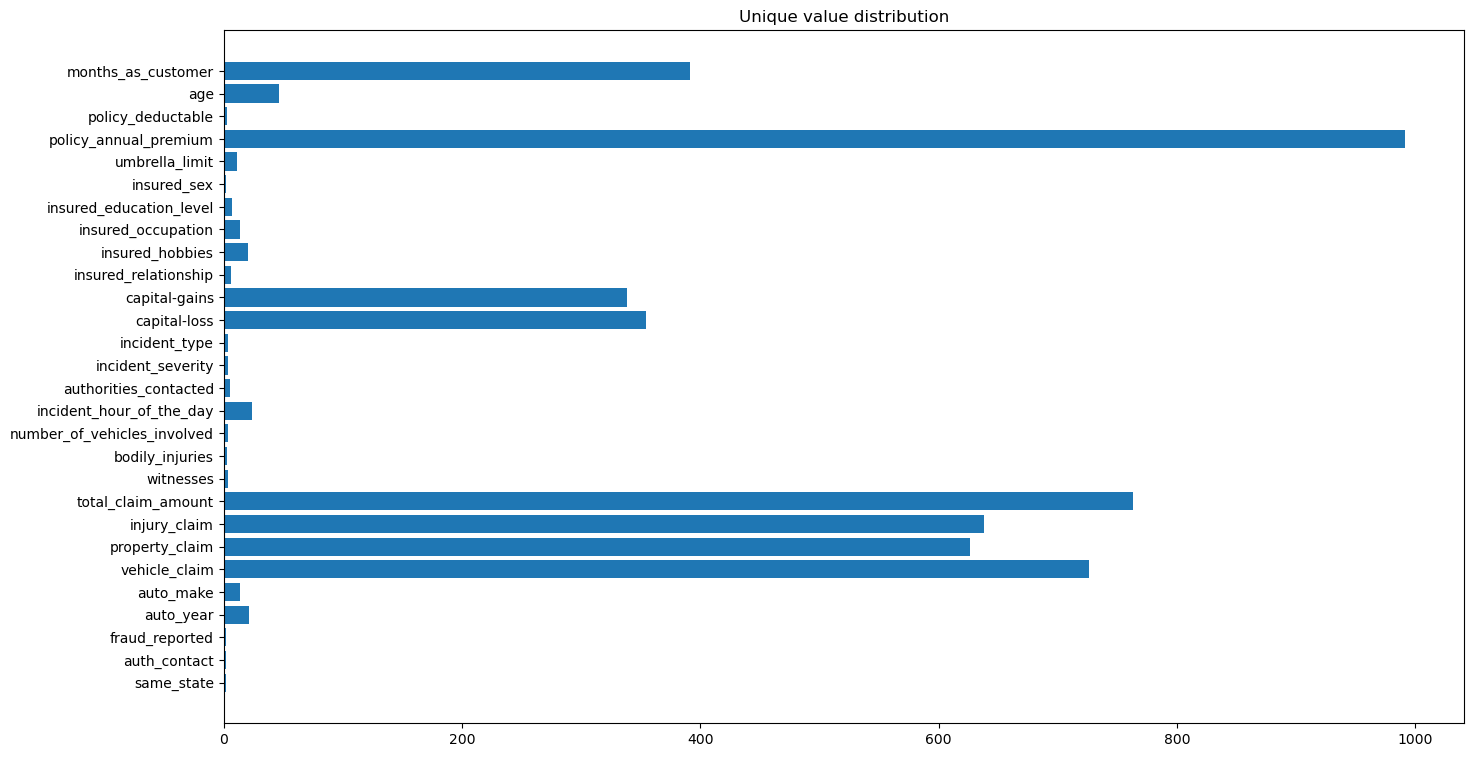

In [47]:
fig, ax = plt.subplots(figsize =(16, 9))
ax.barh(column_names, num_unique_values)
ax.invert_yaxis()
ax.set_title('Unique value distribution', loc ='center', )

plt.show()

C:\Users\carol\AppData\Local\Temp\ipykernel_23196\133148687.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df.corr()


<Axes: >

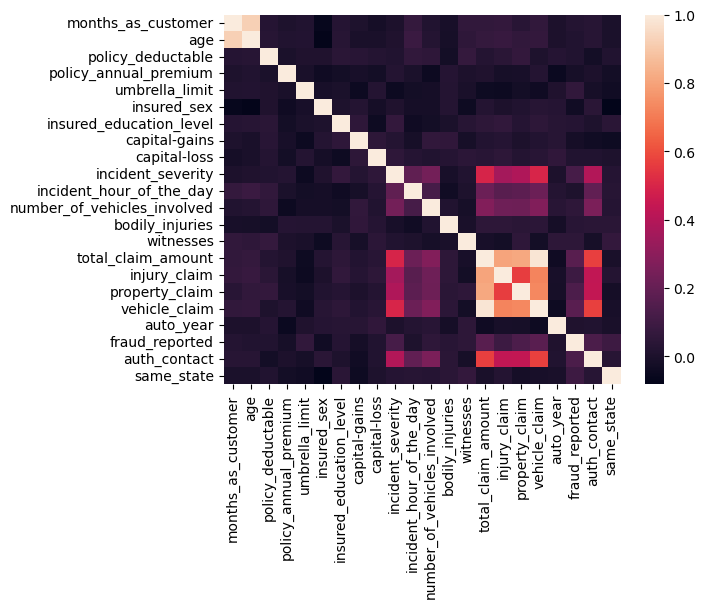

In [48]:
corr=df.corr()
sns.heatmap(corr)

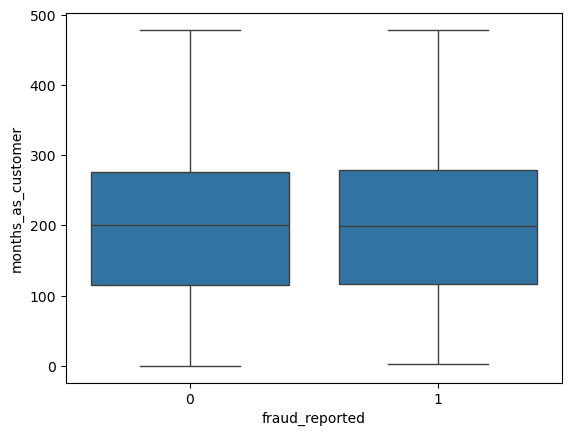

In [49]:
#print EVERY feature compared to fraud yes/no
ax=sns.boxplot(x="fraud_reported", y="months_as_customer", data=df)

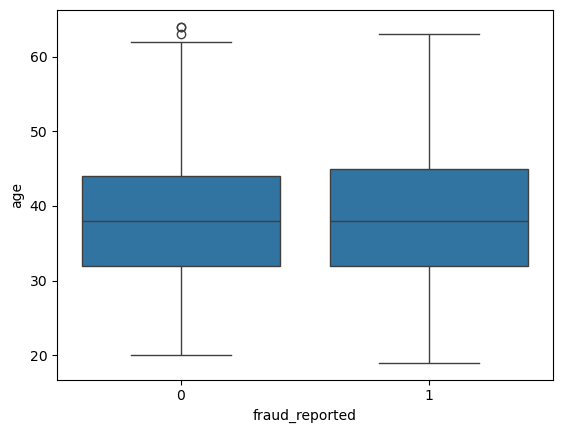

In [50]:
ax=sns.boxplot(x="fraud_reported", y="age", data=df)

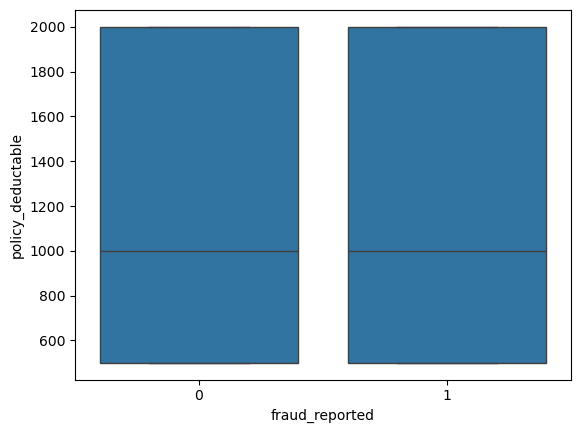

In [51]:
ax=sns.boxplot(x="fraud_reported", y="policy_deductable", data=df)

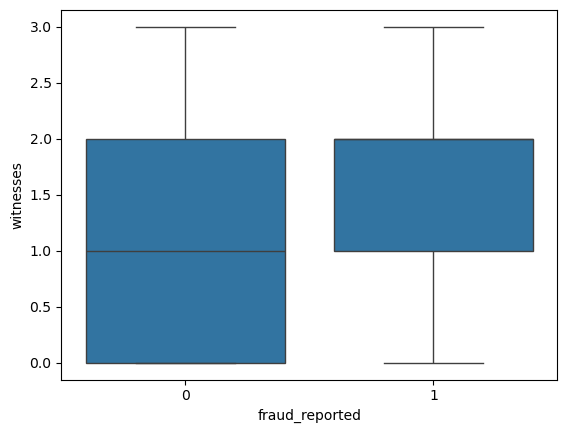

In [52]:
ax=sns.boxplot(x="fraud_reported", y="witnesses", data=df)

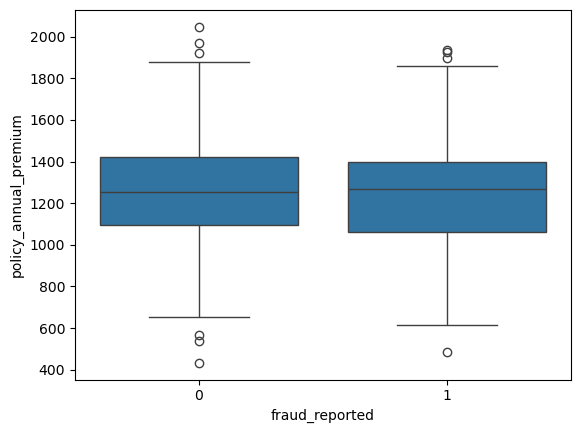

In [53]:
ax=sns.boxplot(x="fraud_reported", y="policy_annual_premium", data=df)

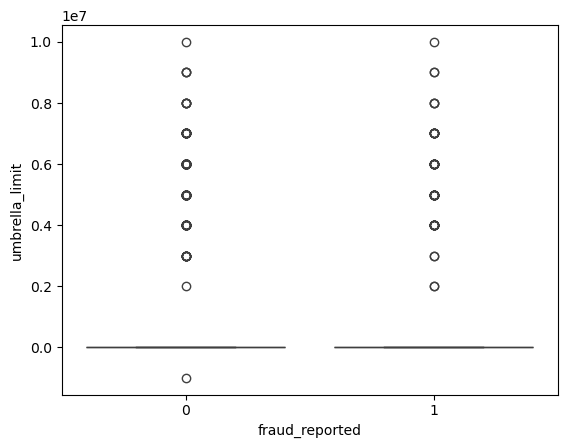

In [54]:
ax=sns.boxplot(x="fraud_reported", y="umbrella_limit", data=df)

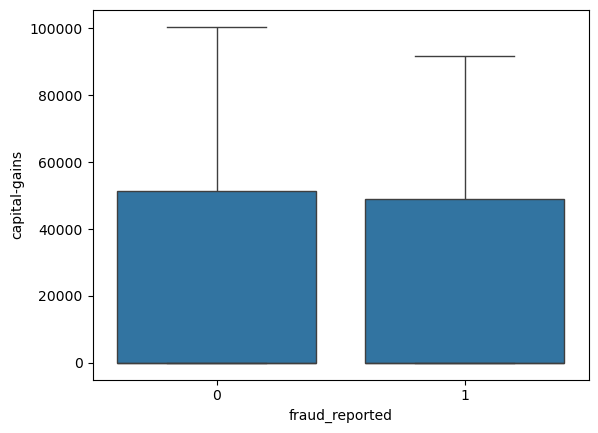

In [55]:
ax=sns.boxplot(x="fraud_reported", y="capital-gains", data=df)

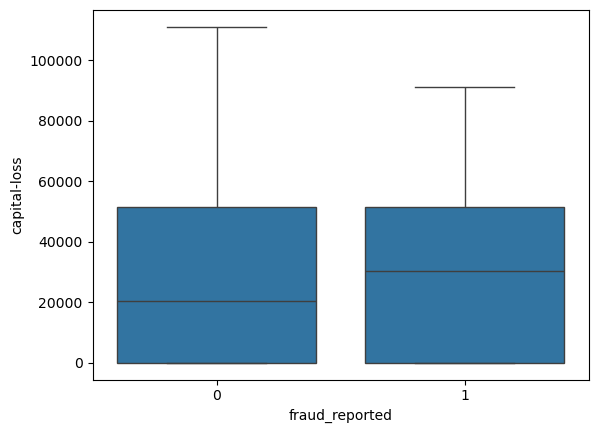

In [56]:
ax=sns.boxplot(x="fraud_reported", y="capital-loss", data=df)

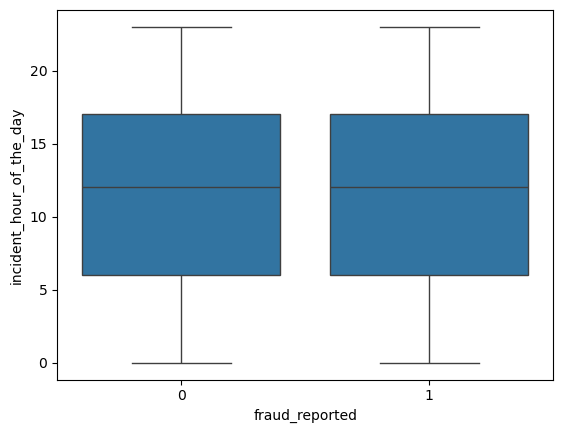

In [57]:
ax=sns.boxplot(x="fraud_reported", y="incident_hour_of_the_day", data=df)

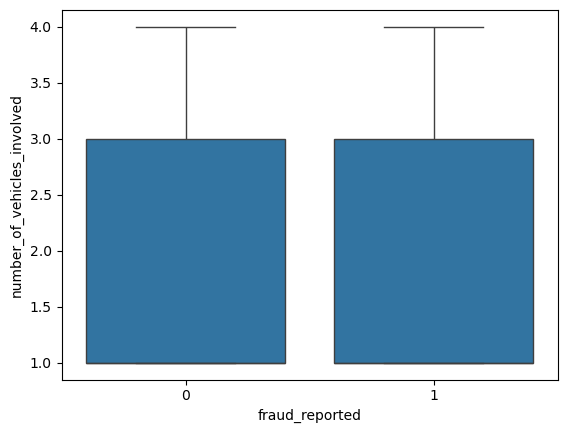

In [58]:
ax=sns.boxplot(x="fraud_reported", y="number_of_vehicles_involved", data=df)

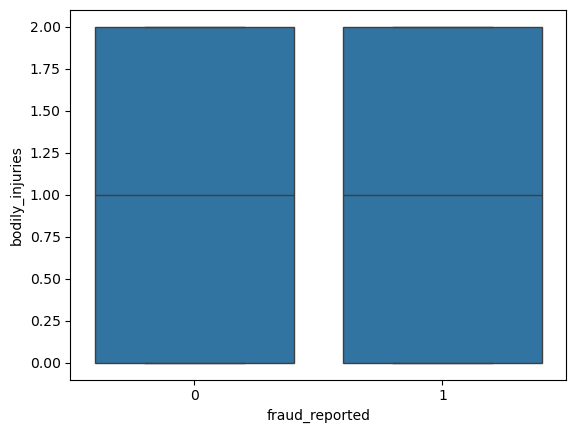

In [59]:
ax=sns.boxplot(x="fraud_reported", y="bodily_injuries", data=df)

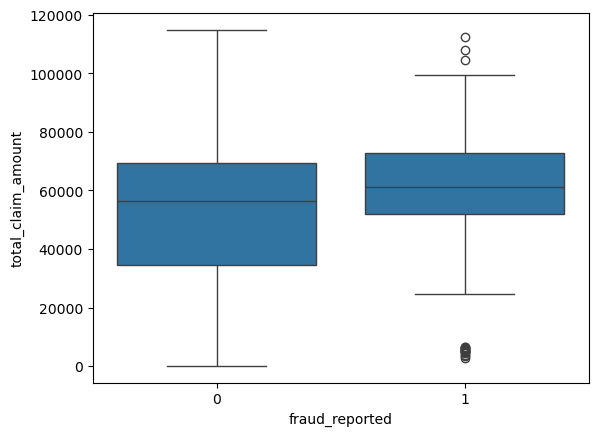

In [60]:
ax=sns.boxplot(x="fraud_reported", y="total_claim_amount", data=df)

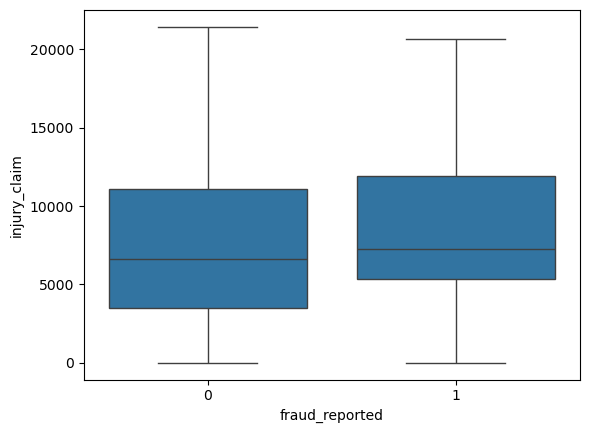

In [61]:
ax=sns.boxplot(x="fraud_reported", y="injury_claim", data=df)

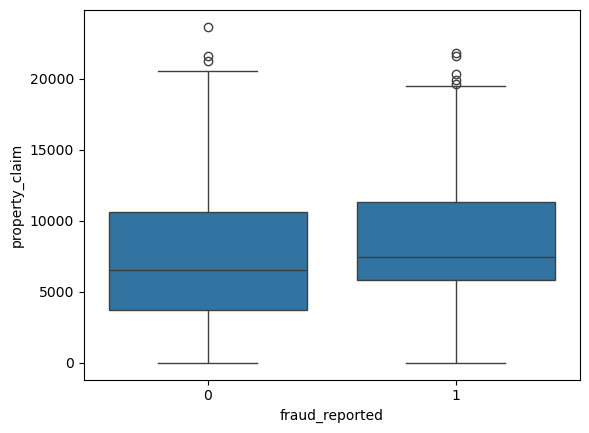

In [62]:
ax=sns.boxplot(x="fraud_reported", y="property_claim", data=df)

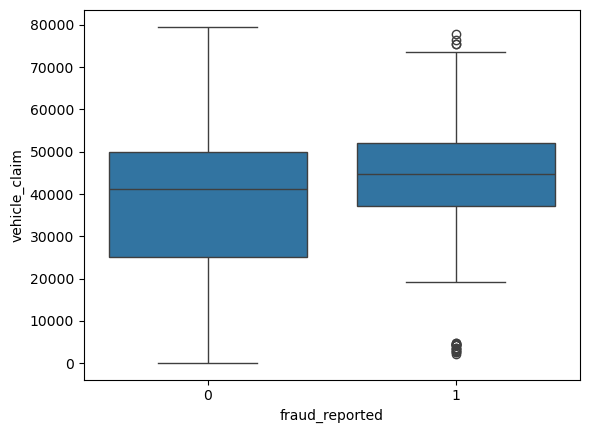

In [63]:
ax=sns.boxplot(x="fraud_reported", y="vehicle_claim", data=df)

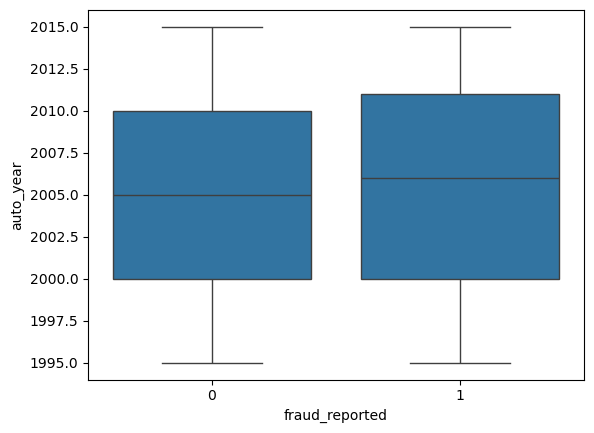

In [64]:
ax=sns.boxplot(x="fraud_reported", y="auto_year", data=df)

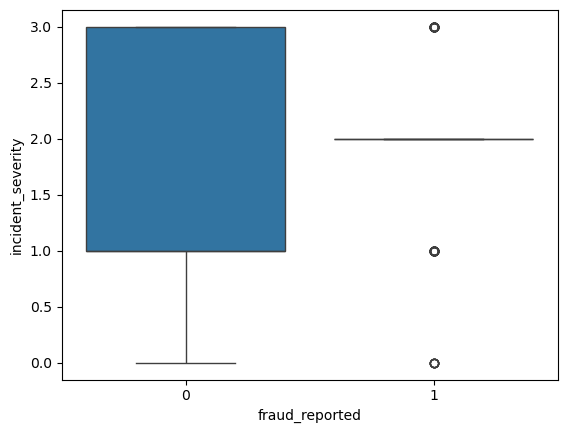

In [65]:
ax=sns.boxplot(x="fraud_reported", y="incident_severity", data=df)

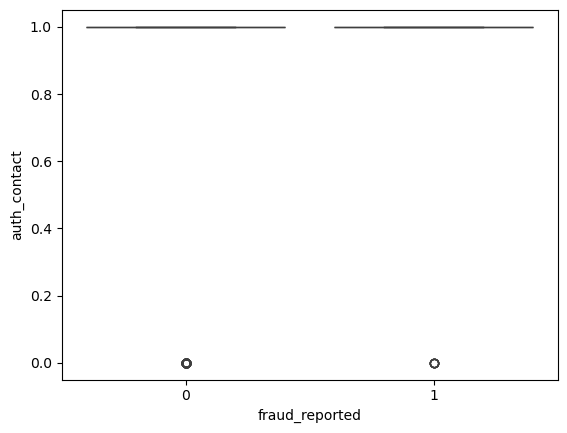

In [66]:
ax=sns.boxplot(x="fraud_reported", y="auth_contact", data=df)

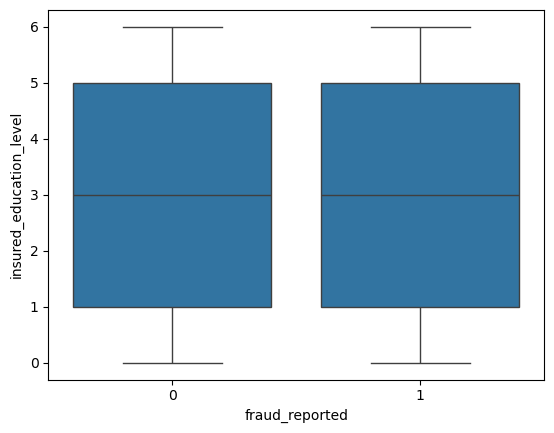

In [67]:
ax=sns.boxplot(x="fraud_reported", y="insured_education_level", data=df)

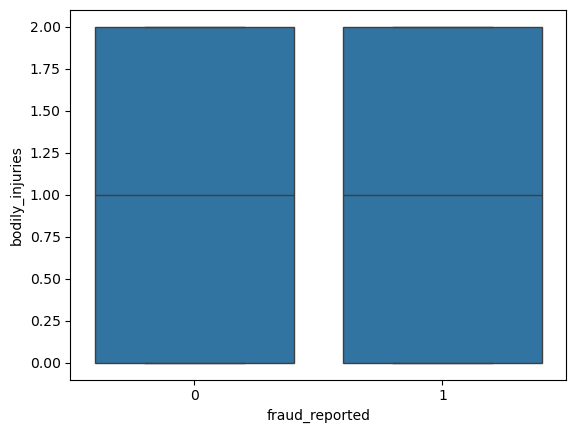

In [68]:
ax=sns.boxplot(x="fraud_reported", y="bodily_injuries", data=df)

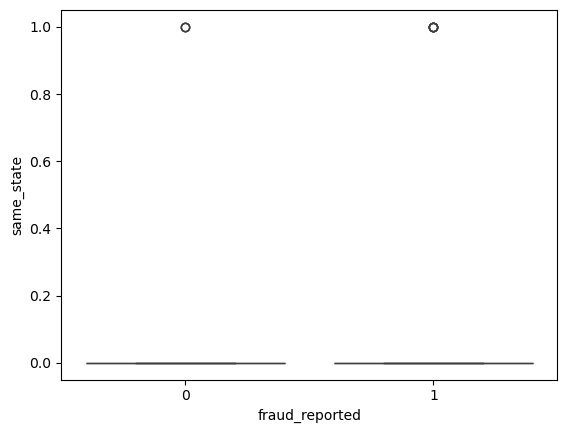

In [69]:
ax=sns.boxplot(x="fraud_reported", y="same_state", data=df)

In [70]:
df.head()

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,incident_severity,authorities_contacted,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_year,fraud_reported,auth_contact,same_state
0,328,48,1000,1406.91,0,0,5,craft-repair,sleeping,husband,53300,0,Single Vehicle Collision,2,Police,5,1,1,2,71610,6510,13020,52080,Saab,2004,1,1,0
1,228,42,2000,1197.22,5000000,0,5,machine-op-inspct,reading,other-relative,0,0,Vehicle Theft,1,Police,8,1,0,0,5070,780,780,3510,Mercedes,2007,1,1,0
2,134,29,2000,1413.14,5000000,1,6,sales,board-games,own-child,35100,0,Multi-vehicle Collision,1,Police,7,3,2,3,34650,7700,3850,23100,Dodge,2007,0,1,0
3,256,41,2000,1415.74,6000000,1,6,armed-forces,board-games,unmarried,48900,62400,Single Vehicle Collision,2,Police,5,1,1,2,63400,6340,6340,50720,Chevrolet,2014,1,1,0
4,228,44,1000,1583.91,6000000,0,2,sales,board-games,unmarried,66000,46000,Vehicle Theft,1,None,20,1,0,1,6500,1300,650,4550,Accura,2009,0,0,0


In [71]:
#FEATURE SCALING
from sklearn.preprocessing import MinMaxScaler

In [72]:
min_max = MinMaxScaler()
cols = ['policy_annual_premium', 'auto_year', 'bodily_injuries', 'auth_contact', 'witnesses', 'insured_sex', 'insured_education_level', 'months_as_customer','policy_deductable', 'age', 'umbrella_limit', 'incident_severity', 'capital-gains', 'capital-loss', 'total_claim_amount', 'incident_hour_of_the_day', 'injury_claim', 'property_claim', 'vehicle_claim', 'number_of_vehicles_involved']

In [73]:
df[cols] = min_max.fit_transform(df[cols])

In [74]:
df.head()

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,incident_severity,authorities_contacted,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_year,fraud_reported,auth_contact,same_state
0,0.684760,0.644444,0.333333,0.603112,0.090909,0.0,0.833333,craft-repair,sleeping,husband,0.530348,0.000000,Single Vehicle Collision,0.666667,Police,0.217391,0.000000,0.5,0.666667,0.622801,0.303497,0.550063,0.654296,Saab,0.45,1,1.0,0
1,0.475992,0.511111,1.000000,0.473214,0.545455,0.0,0.833333,machine-op-inspct,reading,other-relative,0.000000,0.000000,Vehicle Theft,0.333333,Police,0.347826,0.000000,0.0,0.000000,0.043285,0.036364,0.032953,0.043276,Mercedes,0.60,1,1.0,0
2,0.279749,0.222222,1.000000,0.606972,0.545455,1.0,1.000000,sales,board-games,own-child,0.349254,0.000000,Multi-vehicle Collision,0.333333,Police,0.304348,0.666667,1.0,1.000000,0.300906,0.358974,0.162653,0.289722,Dodge,0.60,0,1.0,0
3,0.534447,0.488889,1.000000,0.608582,0.636364,1.0,1.000000,armed-forces,board-games,unmarried,0.486567,0.561656,Single Vehicle Collision,0.666667,Police,0.217391,0.000000,0.5,0.666667,0.551298,0.295571,0.267850,0.637187,Chevrolet,0.95,1,1.0,0
4,0.475992,0.555556,0.333333,0.712760,0.636364,0.0,0.333333,sales,board-games,unmarried,0.656716,0.414041,Vehicle Theft,0.333333,None,0.869565,0.000000,0.0,0.333333,0.055739,0.060606,0.027461,0.056359,Accura,0.70,0,0.0,0


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   float64
 1   age                          1000 non-null   float64
 2   policy_deductable            1000 non-null   float64
 3   policy_annual_premium        1000 non-null   float64
 4   umbrella_limit               1000 non-null   float64
 5   insured_sex                  1000 non-null   float64
 6   insured_education_level      1000 non-null   float64
 7   insured_occupation           1000 non-null   object 
 8   insured_hobbies              1000 non-null   object 
 9   insured_relationship         1000 non-null   object 
 10  capital-gains                1000 non-null   float64
 11  capital-loss                 1000 non-null   float64
 12  incident_type                1000 non-null   object 
 13  incident_severity  

In [76]:
df.describe()

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,capital-gains,capital-loss,incident_severity,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,fraud_reported,auth_contact,same_state
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.425791,0.443289,0.424000,0.509878,0.191000,0.537000,0.492500,0.250011,0.241167,0.582000,0.506261,0.279667,0.496000,0.495667,0.458648,0.346546,0.312614,0.476273,0.505150,0.247000,0.909000,0.009000
std,0.240320,0.203117,0.407910,0.151257,0.208855,0.498879,0.330694,0.277335,0.252962,0.321527,0.302234,0.339627,0.410064,0.370445,0.229938,0.227550,0.203833,0.237593,0.300793,0.431483,0.287753,0.094488
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.241649,0.288889,0.000000,0.406550,0.090909,0.000000,0.166667,0.000000,0.000000,0.333333,0.260870,0.000000,0.000000,0.333333,0.363286,0.200233,0.187790,0.380205,0.250000,0.000000,1.000000,0.000000
50%,0.416493,0.422222,0.333333,0.510370,0.090909,1.000000,0.500000,0.000000,0.209271,0.666667,0.521739,0.000000,0.500000,0.333333,0.504747,0.315851,0.285171,0.528746,0.500000,0.000000,1.000000,0.000000
75%,0.576722,0.555556,1.000000,0.608554,0.090909,1.000000,0.833333,0.507711,0.463546,1.000000,0.739130,0.666667,1.000000,0.666667,0.613939,0.527040,0.459865,0.638477,0.750000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [77]:
print('Training Features shape: ', df.shape)

Training Features shape:  (1000, 28)


In [78]:
df=pd.get_dummies(df)

In [79]:
print('Training Features shape: ', df.shape)

Training Features shape:  (1000, 85)


In [80]:
#SPLIT THE DATA
from sklearn.model_selection import train_test_split 

In [81]:
X = df[df.columns.difference(["fraud_reported"])]
y = df["fraud_reported"]

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [83]:
#BALANCE THE DATA - balance only the training dataset
#Import Libraries for balancing
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
from imblearn.under_sampling import EditedNearestNeighbours

In [84]:
y_train.value_counts()

0    594
1    206
Name: fraud_reported, dtype: int64

In [85]:
sm=SMOTE()
X_train, y_train = sm.fit_resample(X_train, y_train)

In [86]:
y_train.value_counts()

0    594
1    594
Name: fraud_reported, dtype: int64

In [87]:
enn = EditedNearestNeighbours()
X_train, y_train = enn.fit_resample(X_train, y_train)

In [88]:
y_train.value_counts()

0    594
1    571
Name: fraud_reported, dtype: int64

In [89]:
#DEVELOP THE MODELS
from sklearn import metrics

In [90]:
#1) NAIVE BAYES
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()


In [91]:
gnb.fit(X_train, y_train)

GaussianNB()

In [92]:
y_pred_1 = gnb.predict(X_test)

In [93]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_1))

Accuracy: 0.71


In [94]:
print("Precision:",metrics.precision_score(y_test, y_pred_1))

Precision: 0.28205128205128205


In [95]:
print("Recall:",metrics.recall_score(y_test, y_pred_1))

Recall: 0.2682926829268293


In [96]:
#2) SVM
from sklearn.svm import SVC


In [97]:
clf = SVC(kernel="linear")

In [98]:
clf.fit(X_train, y_train)

SVC(kernel='linear')

In [99]:
y_pred_2=clf.predict(X_test)

In [100]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_2))

Accuracy: 0.8


In [101]:
print("Precision:",metrics.precision_score(y_test, y_pred_2))

Precision: 0.6666666666666666


In [102]:
print("Recall:",metrics.recall_score(y_test, y_pred_2))

Recall: 0.04878048780487805


In [103]:
#3) MLP
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification

In [104]:
clf_mlp = MLPClassifier(random_state=1, max_iter=300).fit(X_train, y_train)

C:\Users\carol\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


In [105]:
y_pred_3=clf_mlp.predict(X_test)

In [106]:
clf_mlp.score(X_test, y_test)

0.77

In [107]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_3))

Accuracy: 0.77


In [108]:
print("Precision:",metrics.precision_score(y_test, y_pred_3))

Precision: 0.38095238095238093


In [109]:
print("Recall:",metrics.recall_score(y_test, y_pred_3))

Recall: 0.1951219512195122


In [110]:
#4) Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [111]:
clf_dt = DecisionTreeClassifier()
clf_dt = clf_dt.fit(X_train, y_train)

[Text(0.5397882724430182, 0.9722222222222222, 'x[26] <= 0.337\ngini = 0.5\nsamples = 1165\nvalue = [594, 571]'),
 Text(0.25343536575331194, 0.9166666666666666, 'x[38] <= 0.5\ngini = 0.298\nsamples = 390\nvalue = [319, 71]'),
 Text(0.22710441866205874, 0.8611111111111112, 'x[39] <= 0.5\ngini = 0.202\nsamples = 359\nvalue = [318, 41]'),
 Text(0.2060396609890562, 0.8055555555555556, 'x[0] <= 0.038\ngini = 0.154\nsamples = 346\nvalue = [317, 29]'),
 Text(0.19550728215255492, 0.75, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.21657203982555748, 0.75, 'x[75] <= 0.699\ngini = 0.145\nsamples = 344\nvalue = [317, 27]'),
 Text(0.15666913519295647, 0.6944444444444444, 'x[80] <= 0.048\ngini = 0.128\nsamples = 335\nvalue = [312, 23]'),
 Text(0.06846046243725828, 0.6388888888888888, 'x[82] <= 0.05\ngini = 0.283\nsamples = 82\nvalue = [68, 14]'),
 Text(0.0421295153460051, 0.5833333333333334, 'x[32] <= 0.103\ngini = 0.216\nsamples = 73\nvalue = [64, 9]'),
 Text(0.02106475767300255, 0.5277777777

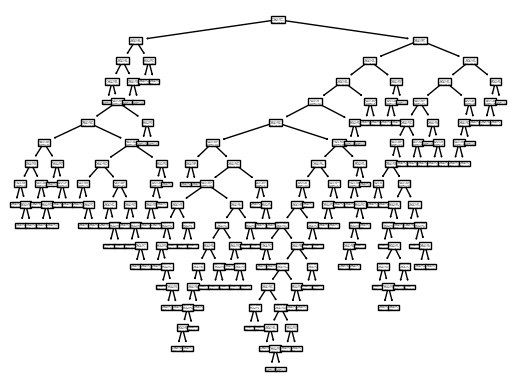

In [112]:
tree.plot_tree(clf_dt)

In [113]:
y_pred_4 = clf_dt.predict(X_test)

In [114]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_4))

Accuracy: 0.75


In [115]:
print("Precision:",metrics.precision_score(y_test, y_pred_4))

Precision: 0.41509433962264153


In [116]:
print("Recall:",metrics.recall_score(y_test, y_pred_4))

Recall: 0.5365853658536586


In [117]:
#5) LSTM

In [118]:
#!pip install keras 

In [119]:
#!pip install --upgrade h5py

In [120]:
#!pip install TensorFlow

In [121]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.callbacks import EarlyStopping
from keras import optimizers

In [122]:
#X_train_lstm = []
#y_train_lstm = []
#for i in range(60,2769):
 #   X_train.append(X_train[i-60:i,0])
  #  y_train.append(y_train[i,0])
#X_train_lstm, y_train_lstm = np.array(X_train_lstm), np.array(y_train_lstm)

In [123]:
#features_set = []
#labels = []
#for i in range(1, 393763):
 #   features_set.append(X_train[i-1:i, 0])
 #   labels.append(X_train[i, 0])

#features_set, labels = np.array(features_set), np.array(labels)

#features_set = np.reshape(features_set, (features_set.shape[0], features_set.shape[1], 1))

In [124]:
#model_lstm = Sequential()

#model_lstm.add(LSTM(512, return_sequences=True,  activation='tanh', input_shape=(features_set.shape[1], 1)))
#model_lstm.add(Dropout(0.2))
#model_lstm.add(Dense(4, activation='softmax'))
#model_lstm.add(LSTM(units=1, activation='sigmoid'))
#model_lstm.add(Dense(4, activation='softmax'))
#opt = optimizers.Adam(lr=0.0001)
#model_lstm.compile(optimizer = opt , loss = 'categorical_crossentropy', metrics = ['accuracy'])

#model_lstm.fit(features_set, labels, epochs = 100, batch_size = 512)

In [125]:
#6) KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler  
from sklearn.model_selection import cross_val_score

In [126]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [127]:
y_pred_5 = knn.predict(X_test)

In [128]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_5))

Accuracy: 0.25


In [129]:
print("Precision:",metrics.precision_score(y_test, y_pred_5))

Precision: 0.19889502762430938


In [130]:
print("Recall:",metrics.recall_score(y_test, y_pred_5))

Recall: 0.8780487804878049


In [131]:
#using cross validation to find best value for k

In [132]:
k_values = [i for i in range (1,31)]
scores = []

scaler = StandardScaler()
X = scaler.fit_transform(X)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X, y, cv=5)
    scores.append(np.mean(score))

Text(0, 0.5, 'Accuracy Score')

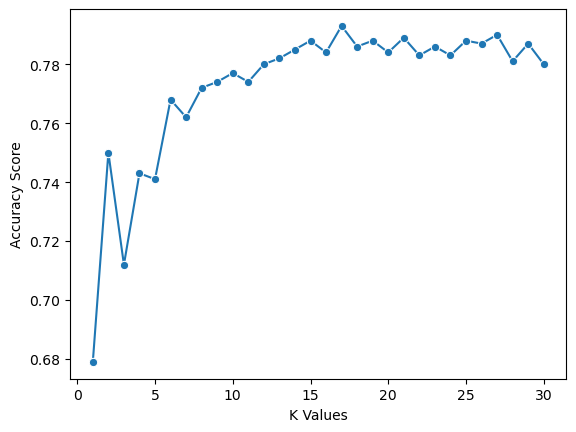

In [133]:
sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")

In [134]:
best_index = np.argmax(scores)
best_k = k_values[best_index]

In [135]:
best_k

17

In [136]:
knn = KNeighborsClassifier(n_neighbors=17)

In [137]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=17)

In [138]:
y_pred_5 = knn.predict(X_test)

In [139]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_5))

Accuracy: 0.25


In [140]:
print("Precision:",metrics.precision_score(y_test, y_pred_5))

Precision: 0.21465968586387435


In [141]:
print("Recall:",metrics.recall_score(y_test, y_pred_5))


Recall: 1.0


In [142]:
#7) Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [143]:
#how many feaatures?????
X_train, y_train = make_classification(n_samples=1000, n_features=84,
                           n_informative=45, n_redundant=0,
                           random_state=0, shuffle=False)
clf_rf = RandomForestClassifier(max_depth=10, random_state=0)
clf_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, random_state=0)

In [144]:
y_pred_6 = clf_rf.predict(X_test)

C:\Users\carol\anaconda3\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


ValueError: X has 84 features, but RandomForestClassifier is expecting 90 features as input.

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_6))

In [ ]:
print("Precision:",metrics.precision_score(y_test, y_pred_6))

In [ ]:
print("Recall:",metrics.recall_score(y_test, y_pred_6))

In [ ]:
#CrossVALIDATION
result = cross_val_score(clf_rf, X_test, y_test, cv=42)
print(result)

In [ ]:
#ENSEMBLE LEARNING

In [ ]:
#Simple averaging
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

In [ ]:
# averaging
pred_final = np.round((y_pred_1 + y_pred_2 + y_pred_3 + y_pred_4 + y_pred_5 + y_pred_6) / 6)

# evalution
accuracy = round(accuracy_score(y_test, pred_final) * 100, 3)
auc = round(roc_auc_score(y_test, pred_final), 3)

print(f" Accuracy: {accuracy}%")
print(f" AUC score: {auc}")

In [ ]:
#BOOSTING
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
# boosting
clf = AdaBoostClassifier()

# training
clf.fit(X_train, y_train)

# prediction
prediction = clf.predict(X_test)

# evaluation
accuracy = round(accuracy_score(y_test, prediction) * 100, 3)
auc = round(roc_auc_score(y_test, prediction), 3)

print(f" Accuracy: {accuracy}%")
print(f" AUC score: {auc}")


In [ ]:
#BAGGING
from sklearn.ensemble import BaggingClassifier

In [ ]:
clf = SVC()

model= BaggingClassifier(estimator=clf, n_estimators=1000, max_samples=200)
model.fit(X_train, y_train)

# prediction
prediction_bag = model.predict(X_test)

# evaluation
accuracy = round(accuracy_score(y_test, prediction_bag) * 100, 3)
auc = round(roc_auc_score(y_test, prediction_bag), 3)

print(f" Accuracy: {accuracy}%")
print(f" AUC score: {auc}")

In [ ]:
#Stacking and boosting
from sklearn.ensemble import StackingClassifier

In [ ]:
estimators = [('GNB', GaussianNB()), ("MLP", MLPClassifier()), ("SVC", SVC()), ("DT", DecisionTreeClassifier()), ("KNN", KNeighborsClassifier()), ("RFC", RandomForestClassifier())]

# building the level 1 model
ADA = AdaBoostClassifier()

SC = StackingClassifier(estimators=estimators,final_estimator=ADA)
SC.fit(X_train, y_train)
y_pred = SC.predict(X_test)


In [ ]:
prediction = SC.predict(X_test)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, prediction))

In [ ]:
print("Precision:",metrics.precision_score(y_test, prediction))

In [ ]:
print("Recall:",metrics.recall_score(y_test, prediction))

In [ ]:
accuracy = round(accuracy_score(y_test, prediction) * 100, 3)
auc = round(roc_auc_score(y_test, prediction), 3)

print(f" Accuracy: {accuracy}%")
print(f" AUC score: {auc}")

In [ ]:
#VISUALIZATIONS